In [192]:
import os

if "backtest_results" in os.getcwd():
    root_path = "../../../"
    # starting including temp
    folder = "temp/" + os.getcwd().split("temp/")[1]

else:
    root_path = "../"
    folder = "temp/backtest_results/DA-Live-Experimental-HMM-v1_2024-01-01_2024-02-13_closing_True_time_before_delivery_4_dynamic_volume_True_5"

In [193]:
import pandas as pd
import numpy as np
import sys

sys.path.append(root_path)
from backtest.util import get_stats, get_orders_in_folder

orders_df = pd.read_csv(
    get_orders_in_folder(f"{root_path}{folder}"), index_col=0, parse_dates=True
)

orders_df["contract"] = pd.to_datetime(orders_df["contract"])
print(get_stats(orders_df))
orders_df

{'pnl': 1853, 'volume': 6042, 'pnl/MWh': 0.31, 'contracts_count': 1007, 'contracts_profitable': 49.35, 'contracts_unprofitable': 50.65, 'max_volume': 6}


,trade_id,action,market,price,volume,total,pnl_trade,signal,contract
date,,,,,,,,,
2023-12-31 18:00:00+00:00,da_trade,buy,Median,0.01,6,-0.06,-0.06,-1,2024-01-01 00:00:00+00:00
2023-12-31 22:30:00+00:00,55,sell,Median,-3.05,-1,-3.05,-3.05,-1,2024-01-01 00:00:00+00:00
2023-12-31 22:35:00+00:00,56,sell,Median,-0.16,-1,-0.16,-0.16,-1,2024-01-01 00:00:00+00:00
2023-12-31 22:40:00+00:00,57,sell,Median,-1.90,-1,-1.90,-1.90,-1,2024-01-01 00:00:00+00:00
2023-12-31 22:45:00+00:00,58,sell,Median,-2.10,-1,-2.10,-2.10,-1,2024-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...
2024-02-13 20:35:00+00:00,56,sell,Median,62.32,-1,62.32,62.32,-1,2024-02-13 22:00:00+00:00
2024-02-13 20:40:00+00:00,57,sell,Median,60.84,-1,60.84,60.84,-1,2024-02-13 22:00:00+00:00
2024-02-13 20:45:00+00:00,58,sell,Median,60.34,-1,60.34,60.34,-1,2024-02-13 22:00:00+00:00


In [194]:
def filter_signal_range(df, range_start, range_end):
    df = df.copy()
    df = df[(df["signal"] >= range_start) & (df["signal"] <= range_end)]

    return df



test_results = []

for index, range_start in enumerate(np.arange(-10, 11, 1)):
    df = filter_signal_range(orders_df, -1000, range_start)
    test_results.append({"range_start": range_start, **get_stats(df)})


results_df = pd.DataFrame(test_results)
results_df

/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:13: RuntimeWarning: invalid value encountered in scalar divide
  pnl_MWh = pnl / volume
/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:27: RuntimeWarning: invalid value encountered in scalar divide
  "contracts_profitable": round(contracts_profitable / contracts_count * 100, 2),
/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:29: RuntimeWarning: invalid value encountered in scalar divide
  contracts_unprofitable / contracts_count * 100, 2
/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:13: RuntimeWarning: invalid value encountered in scalar divide
  pnl_MWh = pnl / volume
/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:27: RuntimeWarning: invalid value encountered in scalar divide
  "contracts_profitable": round(contracts_profitable / contracts_count * 100, 2),
/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:29: RuntimeWarning: inv

,range_start,pnl,volume,pnl/MWh,contracts_count,contracts_profitable,contracts_unprofitable,max_volume
0,-10,0,0,NaN,0,NaN,NaN,NaN
1,-9,0,0,NaN,0,NaN,NaN,NaN
2,-8,0,0,NaN,0,NaN,NaN,NaN
3,-7,0,0,NaN,0,NaN,NaN,NaN
4,-6,0,0,NaN,0,NaN,NaN,NaN
5,-5,0,0,NaN,0,NaN,NaN,NaN
6,-4,0,0,NaN,0,NaN,NaN,NaN
7,-3,0,0,NaN,0,NaN,NaN,NaN
8,-2,0,0,NaN,0,NaN,NaN,NaN
9,-1,-871,5034,-0.17,839,46.13,53.87,6.0


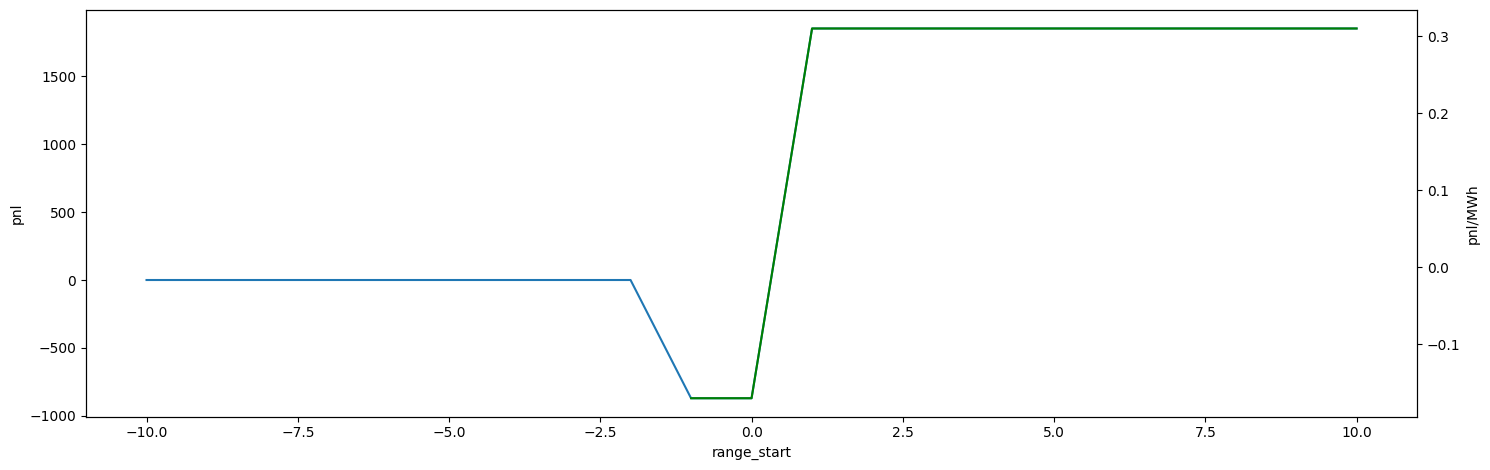

In [195]:
# plot pnl and pnl/MWh on a second y-axis
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

fig.set_figwidth(15)
# grid for every 0.5
ax1.set_xlabel("range_start")
ax1.set_ylabel("pnl")
ax1.plot(results_df["range_start"], results_df["pnl"])
ax1.tick_params(axis="y")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("pnl/MWh")
ax2.plot(results_df["range_start"], results_df["pnl/MWh"], color="g")
ax2.tick_params(axis="y")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Pick best performing range and increase volume of trades.


{'pnl': 0, 'volume': 0, 'pnl/MWh': nan, 'contracts_count': 0, 'contracts_profitable': nan, 'contracts_unprofitable': nan, 'max_volume': nan}
Series([], dtype: int64)


/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:13: RuntimeWarning: invalid value encountered in scalar divide
  pnl_MWh = pnl / volume
/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:27: RuntimeWarning: invalid value encountered in scalar divide
  "contracts_profitable": round(contracts_profitable / contracts_count * 100, 2),
/Users/tonyschumacher/git/t1-models/notebooks/../backtest/util.py:29: RuntimeWarning: invalid value encountered in scalar divide
  contracts_unprofitable / contracts_count * 100, 2


<Axes: xlabel='contract'>

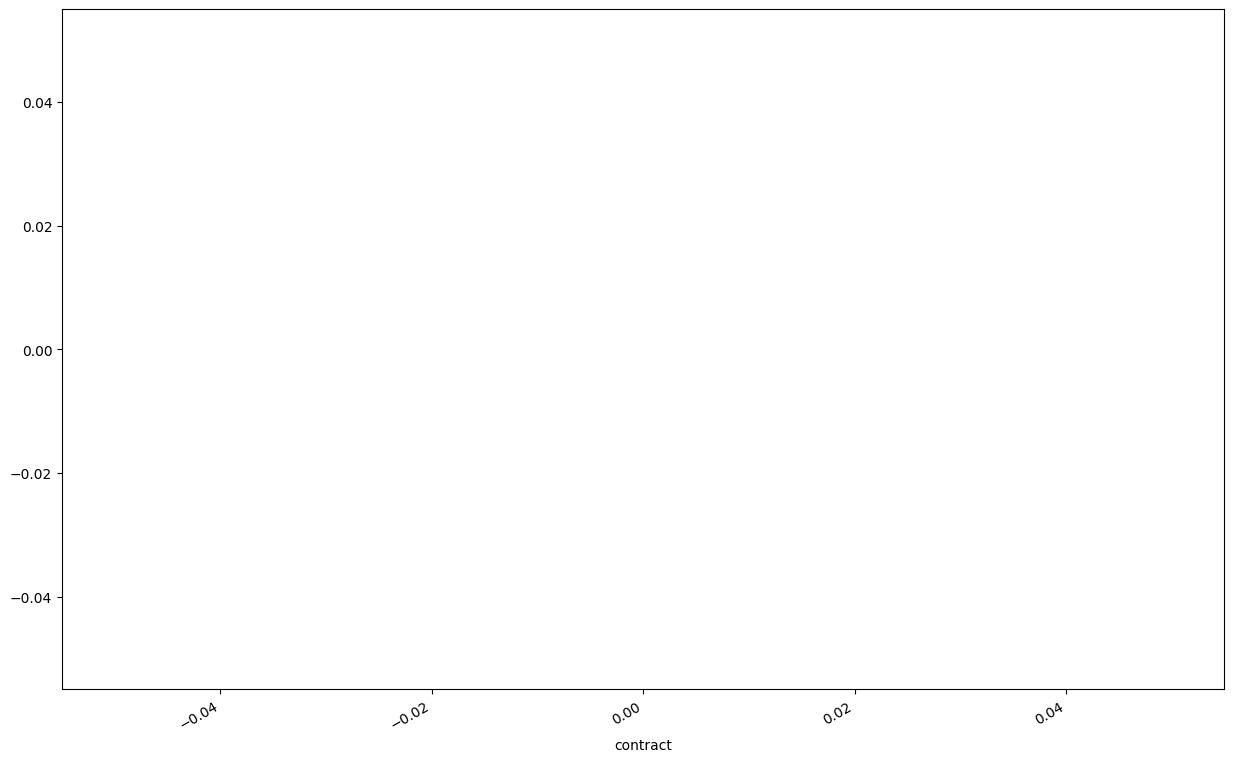

In [196]:
post_orders_df = filter_signal_range(orders_df, -1000, -3)
print(get_stats(post_orders_df))
da_trades = post_orders_df[post_orders_df["trade_id"] == "da_trade"]
# count action == "buy" and action == "sell"
print(da_trades.groupby("action").size())
# sort by index
post_orders_df = post_orders_df.sort_index()
post_orders_by_contract = post_orders_df.groupby("contract").agg(
    {
        "pnl_trade": "sum",
        "volume": "first",  # TODO might be not correct
        "action": "first",
        "signal": "first",
        "action": "first",
        "trade_id" : "first",
    }
)

# post_orders_by_contract.to_csv("post_orders_by_contracts.csv", index=True)
post_orders_by_contract["pnl_trade"].cumsum().plot(figsize=(15, 10))

<Axes: xlabel='contract'>

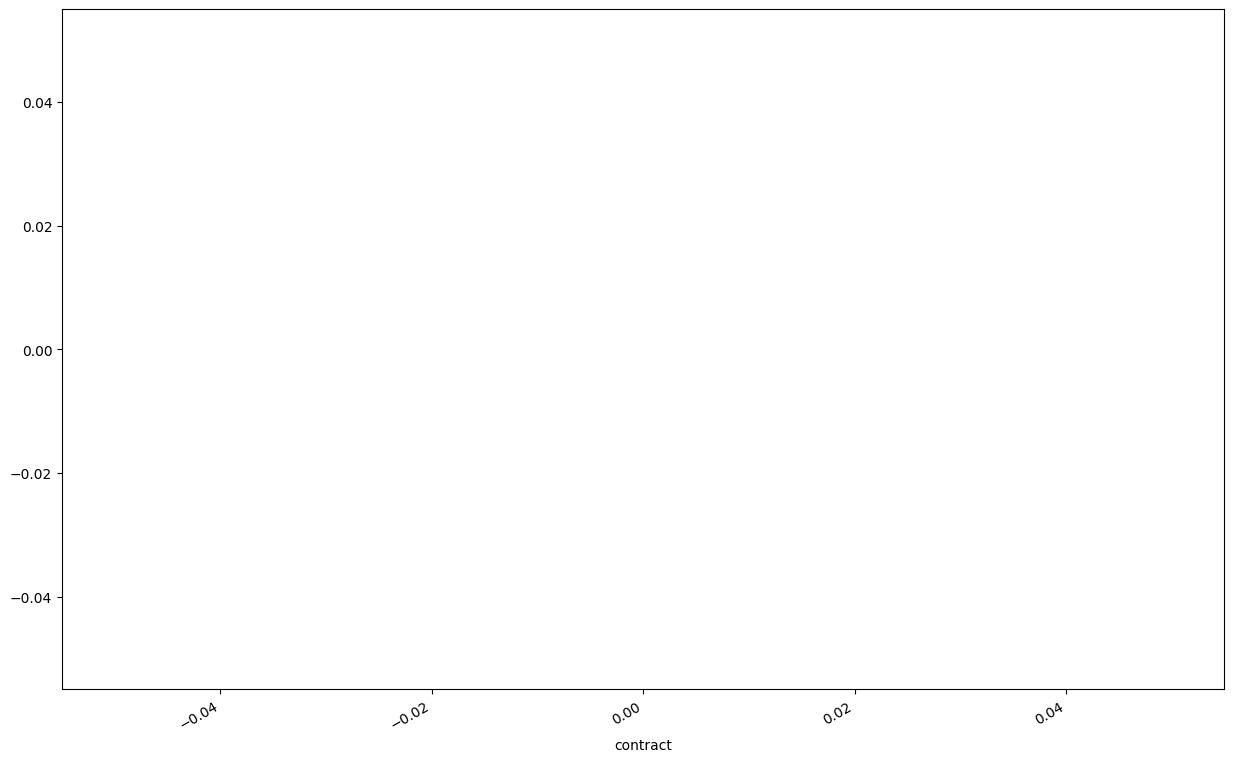

In [197]:
post_orders_by_contract["volume"].plot(figsize=(15, 10))

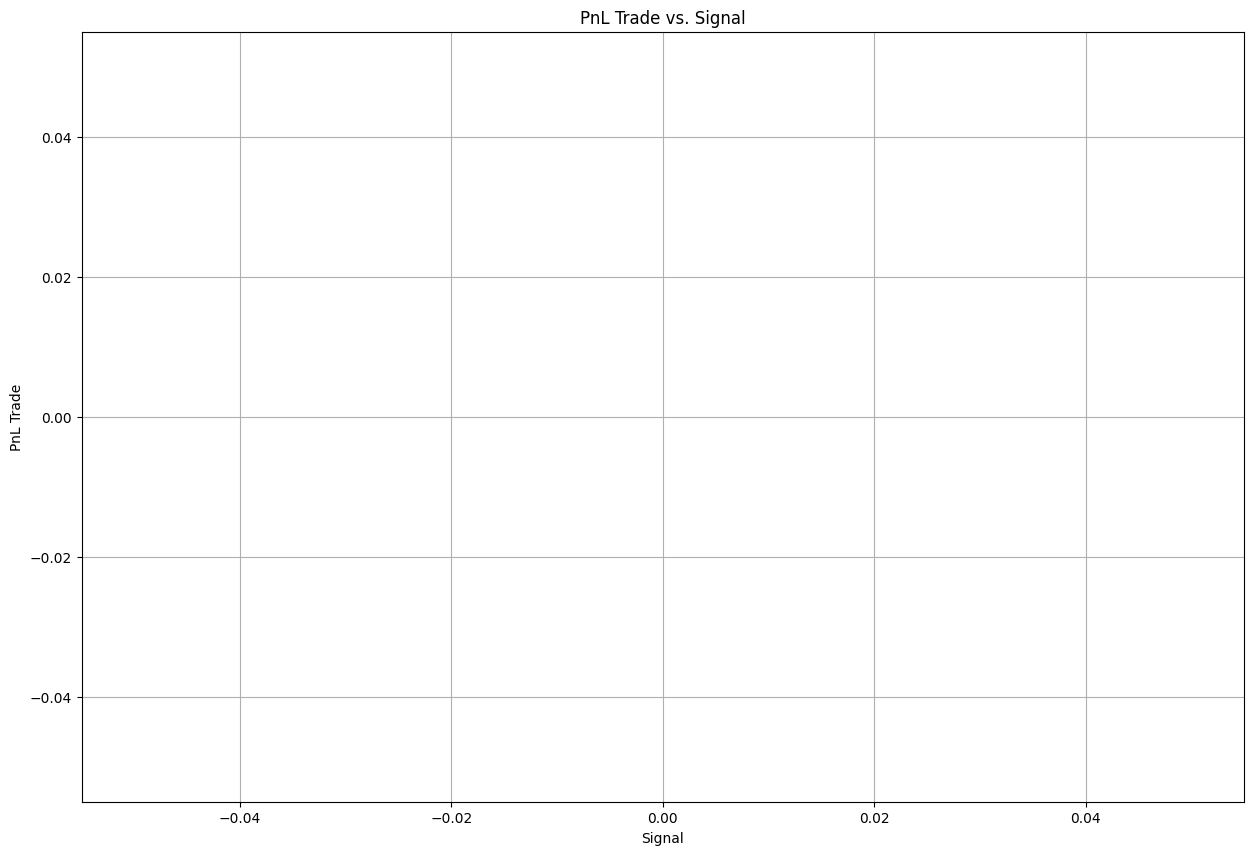

In [198]:
# Plotting function
def plot_pnl_vs_signal(df):
    plt.figure(figsize=(15, 10))
    plt.scatter(df["signal"], df["pnl_trade"], color="blue")
    plt.title("PnL Trade vs. Signal")
    plt.xlabel("Signal")
    plt.ylabel("PnL Trade")
    plt.grid(True)
    plt.show()


plot_pnl_vs_signal(post_orders_by_contract)